Taken from:-

https://www.analyticsvidhya.com/blog/2020/07/how-to-train-an-image-classification-model-in-pytorch-and-tensorflow/

Import libraries

In [1]:
# importing the libraries
import numpy as np
import pandas as pd
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim

Check version of PyTorch

In [2]:
# version of pytorch
print(torch.__version__)

1.8.1+cu101


Transform images

In [3]:
# transformations to be applied on images
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

Load datasets

In [4]:
# defining the training and testing set
trainset = datasets.FashionMNIST('./data', download=True, train=True, transform=transform)
testset = datasets.FashionMNIST('./', download=True, train=False, transform=transform)


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw




Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw




Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw




Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw

Processing...
Done!


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)



Extracting ./FashionMNIST/raw/train-images-idx3-ubyte.gz to ./FashionMNIST/raw




Extracting ./FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./FashionMNIST/raw




Extracting ./FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./FashionMNIST/raw




Extracting ./FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./FashionMNIST/raw

Processing...
Done!


In [5]:
# defining trainloader and testloader
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

Summary

In [6]:
# shape of training data
dataiter = iter(trainloader)
images, labels = dataiter.next()

print(images.shape)
print(labels.shape)

torch.Size([64, 1, 28, 28])
torch.Size([64])


Visualise training images

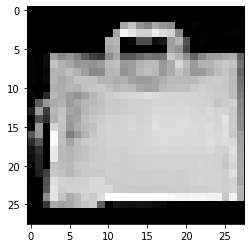

In [7]:
# visualizing the training images
plt.imshow(images[0].numpy().squeeze(), cmap='gray')

Visualise test image

In [8]:
# shape of validation data
dataiter = iter(testloader)
images, labels = dataiter.next()

print(images.shape)
print(labels.shape)

torch.Size([64, 1, 28, 28])
torch.Size([64])


Define CNN

In [9]:
# defining the model architecture
class Net(nn.Module):   
  def __init__(self):
      super(Net, self).__init__()

      self.cnn_layers = nn.Sequential(
          # Defining a 2D convolution layer
          nn.Conv2d(1, 4, kernel_size=3, stride=1, padding=1),
          nn.BatchNorm2d(4),
          nn.ReLU(inplace=True),
          nn.MaxPool2d(kernel_size=2, stride=2),
          # Defining another 2D convolution layer
          nn.Conv2d(4, 4, kernel_size=3, stride=1, padding=1),
          nn.BatchNorm2d(4),
          nn.ReLU(inplace=True),
          nn.MaxPool2d(kernel_size=2, stride=2),
      )

      self.linear_layers = nn.Sequential(
          nn.Linear(4 * 7 * 7, 10)
      )

  # Defining the forward pass    
  def forward(self, x):
      x = self.cnn_layers(x)
      x = x.view(x.size(0), -1)
      x = self.linear_layers(x)
      return x

Define optimiser and loss function

In [10]:
# defining the model
model = Net()
# defining the optimizer
optimizer = optim.Adam(model.parameters(), lr=0.01)
# defining the loss function
criterion = nn.CrossEntropyLoss()
# checking if GPU is available
if torch.cuda.is_available():
    model = model.cuda()
    criterion = criterion.cuda()
    
print(model)

Net(
  (cnn_layers): Sequential(
    (0): Conv2d(1, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(4, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU(inplace=True)
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (linear_layers): Sequential(
    (0): Linear(in_features=196, out_features=10, bias=True)
  )
)


Train model

In [11]:
epoch = 20

for i in range(epoch):
    running_loss = 0
    for images, labels in trainloader:

        if torch.cuda.is_available():
          images = images.cuda()
          labels = labels.cuda()

        # Training pass
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output, labels)
        
        #This is where the model learns by backpropagating
        loss.backward()
        
        #And optimizes its weights here
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print("Epoch {} - Training loss: {}".format(i+1, running_loss/len(trainloader)))

Epoch 1 - Training loss: 0.4706022530190472
Epoch 2 - Training loss: 0.3774307944388913
Epoch 3 - Training loss: 0.35689753905605914
Epoch 4 - Training loss: 0.34562419829115687
Epoch 5 - Training loss: 0.33847483666117256
Epoch 6 - Training loss: 0.3319125332113014
Epoch 7 - Training loss: 0.3277707615180183
Epoch 8 - Training loss: 0.32298473694494795
Epoch 9 - Training loss: 0.3205051493368296
Epoch 10 - Training loss: 0.3190131538045178
Epoch 11 - Training loss: 0.3176096751809374
Epoch 12 - Training loss: 0.316602032687237
Epoch 13 - Training loss: 0.3126062686398212
Epoch 14 - Training loss: 0.30952156563875266
Epoch 15 - Training loss: 0.3084248910421756
Epoch 16 - Training loss: 0.30802638107525515
Epoch 17 - Training loss: 0.3045960367599657
Epoch 18 - Training loss: 0.3041106284395464
Epoch 19 - Training loss: 0.3029134823267521
Epoch 20 - Training loss: 0.30339669511675327


Check performance on test set

In [12]:
# getting predictions on test set and measuring the performance

prediction  = []
label = []

correct_count, all_count = 0, 0
for images,labels in testloader:
  for i in range(len(labels)):
    if torch.cuda.is_available():
        images = images.cuda()
        labels = labels.cuda()
    img = images[i].view(1, 1, 28, 28)
    with torch.no_grad():
        logps = model(img)

    
    ps = torch.exp(logps)
    probab = list(ps.cpu()[0])
    pred_label = probab.index(max(probab))
    true_label = labels.cpu()[i]
    if(true_label == pred_label):
      correct_count += 1
    all_count += 1
    prediction.append(pred_label)
    label.append(true_label)

print("Number Of Images Tested =", all_count)
print("\nModel Accuracy =", (correct_count/all_count))

Number Of Images Tested = 10000

Model Accuracy = 0.839


In [13]:
len(prediction)

10000

In [14]:
len(label)

10000

In [15]:
from sklearn.metrics import confusion_matrix

confusion_matrix(label, prediction)

array([[839,   0,   6,  23,   5,   1, 119,   0,   7,   0],
       [  3, 976,   0,  14,   0,   0,   5,   0,   2,   0],
       [ 22,   1, 536,   6, 150,   0, 278,   0,   7,   0],
       [ 26,  16,   7, 851,  28,   0,  68,   0,   4,   0],
       [  0,   3,  26,  33, 705,   0, 226,   0,   7,   0],
       [  2,   0,   0,   0,   0, 921,   1,  32,  10,  34],
       [147,   2,  24,  27,  84,   0, 687,   0,  29,   0],
       [  0,   0,   0,   0,   0,  11,   0, 956,   6,  27],
       [  5,   5,   0,   3,   3,   3,  22,   3, 955,   1],
       [  1,   0,   0,   0,   0,   1,   1,  33,   0, 964]])

In [16]:
df = pd.DataFrame({'Actual': label, 'Predicted':prediction})
df

,Actual,Predicted
0,tensor(2),2
1,tensor(8),3
2,tensor(7),7
3,tensor(3),3
4,tensor(3),3
...,...,...
9995,tensor(6),6
9996,tensor(6),6
9997,tensor(9),9
9998,tensor(8),8
